<a href="https://colab.research.google.com/github/raeubaen/ml/blob/master/Lanni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importo le librerie necessarie e imposto dei parametri grafici

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['axes.facecolor'] = '#f7f9fc'

Importo e sistemo i dati necessari

In [0]:
fsi = pd.read_csv("Financial_Soundness_Indicators_FSI.csv")
fsi = fsi.rename({"Unnamed: 0": "Country"}, axis=1)

Tabella dei rapporti crediti deteriorati / PIL:

In [0]:
fsi

,Country,2008,Q1 2008,Q2 2008,Q3 2008,Q4 2008,2009,Q1 2009,Q2 2009,Q3 2009,...,2018,Q1 2018,Q2 2018,Q3 2018,Q4 2018,2019,Q1 2019,Q2 2019,Q3 2019,Q4 2019
0,Austria,1.90,NaN,NaN,NaN,NaN,2.25,NaN,NaN,NaN,...,1.88,2.26,2.12,2.05,1.88,1.63,1.82,1.70,1.65,1.63
1,Belgium,1.65,NaN,1.13,NaN,1.65,3.08,NaN,2.42,NaN,...,2.27,2.53,2.43,2.17,2.27,2.09,2.13,2.03,2.04,2.09
2,Bulgaria,2.40,NaN,NaN,NaN,NaN,6.42,NaN,NaN,NaN,...,7.80,9.56,9.29,8.68,7.80,NaN,7.55,7.31,7.56,NaN
3,"Croatia, Rep. of",4.87,4.78,4.76,4.77,4.87,7.66,5.15,5.97,6.42,...,9.71,11.26,11.08,10.16,9.71,6.99,9.41,9.09,7.63,6.99
4,Cyprus,3.59,NaN,NaN,NaN,3.59,4.51,3.81,4.09,4.50,...,19.52,30.40,27.46,21.14,19.52,NaN,20.01,18.63,18.14,NaN
5,Czech Rep.,2.81,2.47,2.30,2.56,2.81,4.58,3.28,3.78,4.28,...,3.14,3.43,3.28,3.20,3.14,2.70,3.30,2.99,2.86,2.70
6,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.71,4.11,3.07,1.72,1.71,1.72,1.39,1.34,1.70,1.72
7,"Estonia, Rep. of",1.94,NaN,NaN,NaN,1.94,5.20,3.20,4.46,5.33,...,0.45,0.65,0.56,1.37,0.45,0.36,0.44,0.38,0.37,0.36
8,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.43,1.54,1.47,1.47,1.43,1.39,1.52,1.50,1.44,1.39
9,France,2.82,NaN,NaN,NaN,NaN,4.02,NaN,NaN,NaN,...,2.75,3.07,2.94,2.84,2.75,NaN,2.69,2.61,2.59,NaN


Grafico con la serie temporale dei rapporti

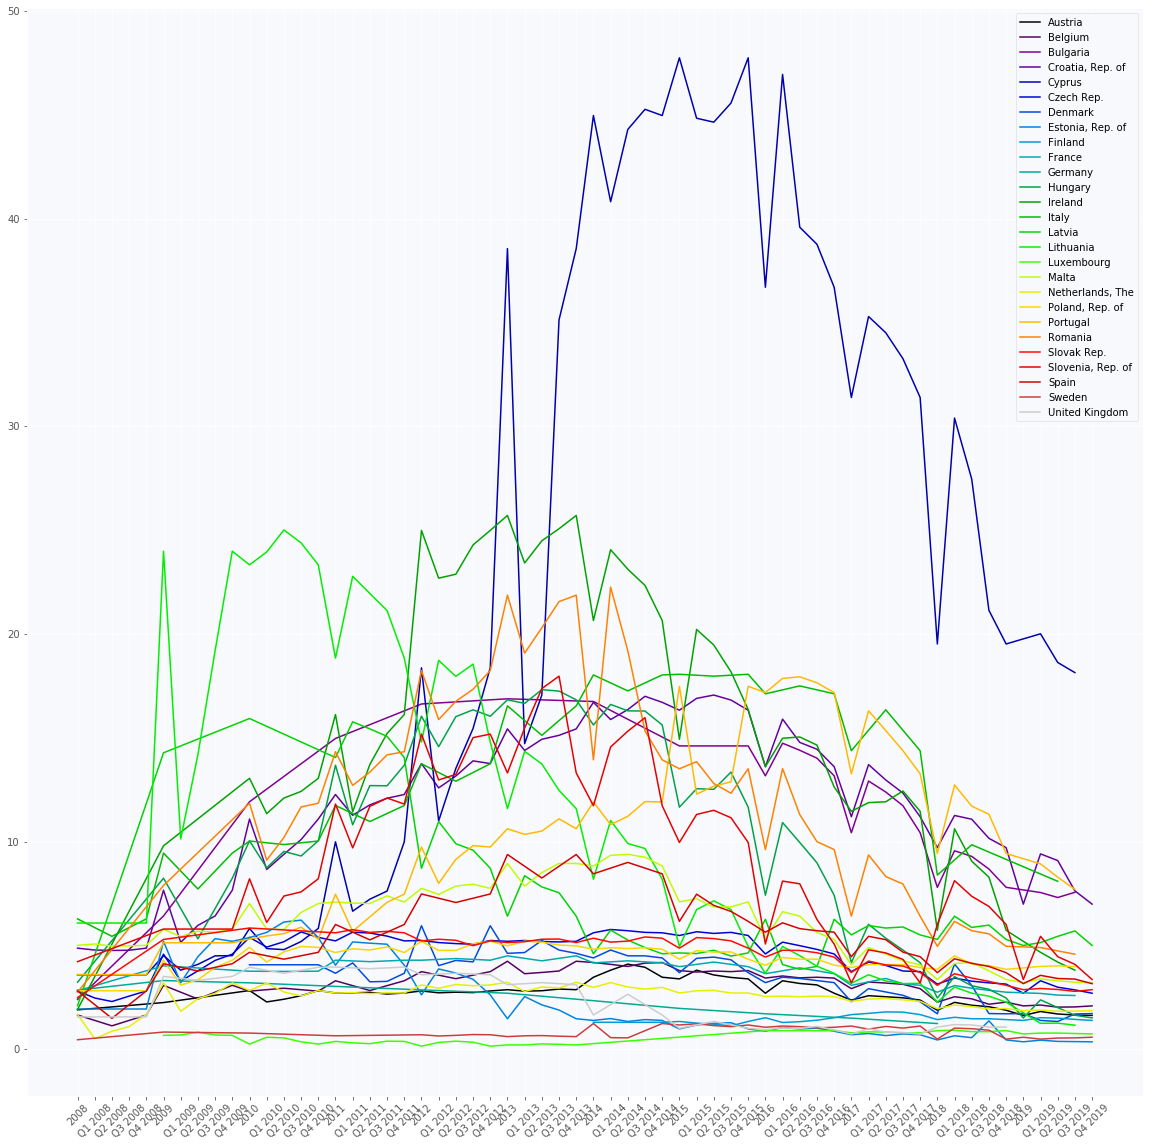

In [0]:
fig, ax = plt.subplots(figsize=(20, 20))
colormap = plt.cm.nipy_spectral 
colors = [colormap(i) for i in np.linspace(0, 1, len(fsi))]
ax.set_prop_cycle('color', colors)
cls_num = np.arange(1, len(fsi.columns))
cls_names = fsi.columns[1:]
for i in range(len(fsi)):
    values = []
    for j in cls_num:
        values.append(fsi.iloc[i, j])
    values = np.asarray(values)
    mask = np.isfinite(values)
    ax.plot(cls_num[mask], values[mask], label=fsi.iloc[i, 0])
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(cls_num)
ax.set_xticklabels(cls_names)
ax.legend()

Importo i dati sulla presenza o meno dell'AMC

In [0]:
amc = pd.read_excel("AMC paesi.xlsx")
amc = ams.rename({"Unnamed: 0": "Country"}, axis=1)

In [0]:
amc

,Country,AMC
0,Austria,1
1,Belgium,1
2,Bulgaria,0
3,"Croatia,Rep. of",0
4,Cyprus,0
5,Czech Rep,0
6,Denmark,1
7,EE--Estonia?,0
8,Finland,0
9,France,1


Controllo che l'ordine dei paesi per riga sia lo stesso

In [0]:
df = pd.DataFrame({"fsi": fsi["Unnamed: 0"], "ams": dates["Unnamed: 0"]})

In [0]:
df

,fsi,ams
0,Austria,Austria
1,Belgium,Belgium
2,Bulgaria,Bulgaria
3,"Croatia, Rep. of","Croatia,Rep. of"
4,Cyprus,Cyprus
5,Czech Rep.,Czech Rep
6,Denmark,Denmark
7,"Estonia, Rep. of",EE--Estonia?
8,Finland,Finland
9,France,France
